In [1]:
import pandas as pd

In [10]:
path_compare = '../data/processed/compare.csv'
data_df = pd.read_csv(path_compare)
data_df['Units'] = pd.to_numeric(data_df['Units'].astype(str).str.replace(r'\D', ''), errors='coerce')

In [11]:
# Inspect the first few rows of the DataFrame
data_df.head()

,physician,Procedure Code,Procedure Description,Units,Charge
0,phan,11055,TRIM SKIN LESION,2,$437.40
1,phan,11056,TRIM SKIN LESIONS 2 TO 4,13,"$3,146.31"
2,phan,11719,TRIM NAIL(S),17,$674.61
3,phan,11720,NAIL DEBRIDEMENT/CALLOUS,5,$465.20
4,phan,11721,NAIL DEBRIDEMENT/CALLOUS,12,"$1,500.06"


In [12]:
# Update the 'Hours Worked' for each physician
data_df.loc[data_df['physician'] == 'phan', 'Hours Worked'] = 30  # Assuming Phan works 30 hours
data_df.loc[data_df['physician'] == 'flubba', 'Hours Worked'] = 28  # Assuming Flubba works 28 hours



Fantastic! Now that you have added the hours worked manually to your DataFrame, the next steps are to:

Aggregate the total units (procedures) performed by each physician.
Calculate the rate of procedures per hour for each physician.
Compare these rates to see how each physician performs relative to the others.
Since you've got this set up in your notebook, I can guide you through the code you would need to use to perform these calculations. Here's what the code would look like:

In [13]:
# Group the data by physician and sum the Units and Hours Worked
grouped_data = data_df.groupby('physician').agg({
    'Units': 'sum',
    'Hours Worked': 'first'  # Assuming the hours worked are the same for all entries of a physician
}).reset_index()

# Calculate the rate of procedures per hour for each physician
grouped_data['Rate per Hour'] = grouped_data['Units'] / grouped_data['Hours Worked']

# Display the resulting DataFrame
grouped_data


,physician,Units,Hours Worked,Rate per Hour
0,flubba,30,28.0,1.071429
1,phan,124,30.0,4.133333


In [14]:
# Group the data by physician and sum the Units
# Since we don't have the actual hours worked, we won't aggregate that in this step
grouped_data = data_df.groupby('physician').agg({
    'Units': 'sum',
    # We'll take the first non-null value for hours worked assuming it's the same for all their procedures
    'Hours Worked': 'first'  
}).reset_index()

# Calculate the rate of procedures per hour for each physician
grouped_data['Rate per Hour'] = grouped_data['Units'] / grouped_data['Hours Worked']

# Display the resulting DataFrame
grouped_data

,physician,Units,Hours Worked,Rate per Hour
0,flubba,30,28.0,1.071429
1,phan,124,30.0,4.133333


To perform an analysis that compares the procedures conducted by each physician and identify potential areas for improvement, you can follow these steps:

Compare Procedure Frequencies: Calculate the frequency of each procedure for both physicians.

Procedure Value Analysis: Use the charge information to assess the value of each procedure. This involves cleaning the charge data to convert it into a numeric format and then multiplying by the number of units to get the total value for each procedure.

Identify Differences: Identify which high-value procedures are performed less frequently by Dr. Flubba compared to Dr. Phan.

Make Recommendations: Based on the difference, you can recommend which procedures Dr. Flubba should focus on to improve their overall value of services provided.

Let’s start with the first step by comparing the frequency of each procedure code for both physicians. We'll need to clean the 'Charge' column to convert it into a float for analysis. Then we'll sum the total charges for each procedure code for each physician.

After we have the frequency and value of each procedure, we can identify which procedures are performed less by Dr. Flubba but contribute significantly to the revenue based on Dr. Phan’s data.

In [15]:
# First, we need to clean the 'Charge' column to convert it into a float
data_df['Charge'] = data_df['Charge'].replace('[\$,]', '', regex=True).astype(float)

# Now, let's group the data by physician and procedure code to calculate the total units and total charge
procedure_data = data_df.groupby(['physician', 'Procedure Code']).agg({
    'Units': 'sum',
    'Charge': 'sum'
}).reset_index()

# Pivot the data to compare the procedures and charges for each physician
procedure_comparison = procedure_data.pivot(index='Procedure Code', columns='physician', values=['Units', 'Charge'])
procedure_comparison = procedure_comparison.fillna(0)  # Fill NaN values with 0 for better comparison

# Display the resulting DataFrame
procedure_comparison


Units          Charge         
physician      flubba  phan    flubba     phan
Procedure Code                                
11055             2.0   2.0    437.40   437.40
11056             3.0  13.0   3146.31  3146.31
11719             0.0  17.0      0.00   674.61
11720             0.0   5.0      0.00   465.20
11721             0.0  12.0      0.00  1500.06
11730             0.0   5.0      0.00  1656.59
11732             0.0   1.0      0.00    93.33
17110             0.0  23.0      0.00  7674.47
20550             0.0   7.0      0.00  1133.39
29550             0.0   1.0      0.00    52.88
73630             0.0  16.0      0.00  1619.08
97597             0.0   5.0      0.00  1480.25
J3301             0.0   7.0      0.00   105.00
L1902             0.0  10.0      0.00  1216.20
L3000             5.0   0.0  24750.00     0.00
L4361             5.0   0.0   3418.10     0.00
L4387             5.0   0.0   1313.40     0.00
L4397            10.0   0.0   6293.04     0.00

In [16]:
# Group the data by physician, procedure code and description to calculate the total units and total charge
procedure_data = data_df.groupby(['physician', 'Procedure Code', 'Procedure Description']).agg({
    'Units': 'sum',
    'Charge': 'sum'
}).reset_index()

# Pivot the data to compare the procedures and charges for each physician, including the procedure description
procedure_comparison = procedure_data.pivot_table(
    index=['Procedure Code', 'Procedure Description'], 
    columns='physician', 
    values=['Units', 'Charge'],
    aggfunc='sum'
)
procedure_comparison = procedure_comparison.fillna(0)  # Fill NaN values with 0 for better comparison

# Display the resulting DataFrame
procedure_comparison


Charge           Units      
physician                                       flubba     phan flubba  phan
Procedure Code Procedure Description                                        
11055          TRIM SKIN LESION                 437.40   437.40    2.0   2.0
11056          TRIM SKIN LESIONS 2 TO 4        3146.31  3146.31    3.0  13.0
11719          TRIM NAIL(S)                       0.00   674.61    0.0  17.0
11720          NAIL DEBRIDEMENT/CALLOUS           0.00   465.20    0.0   5.0
11721          NAIL DEBRIDEMENT/CALLOUS           0.00  1500.06    0.0  12.0
11730          NAIL AVULSION (PER TOE)            0.00  1656.59    0.0   5.0
11732          REMOVE NAIL PLATE ADD-ON           0.00    93.33    0.0   1.0
17110          WART DESTRUCTION                   0.00  7674.47    0.0  23.0
20550          INJECTIONS                         0.00  1133.39    0.0   7.0
29550          STRAPPING OF TOES                  0.00    52.88    0.0   1.0
73630          X-RAY EXAM OF FOOT                 0.00  1619.08    0.0  16.0
97597          WOUND DEBRIDEMENT SUPERFICIAL      0.00  1480.25    0.0   5.0
J3301          Triamcinolone acet inj NOS         0.00   105.00    0.0   7.0
L1902          A60=PTTD=WEB=GAMEDAY               0.00  1216.20    0.0  10.0
L3000          CUSTOM ORTHOTICS               24750.00     0.00    5.0   0.0
L4361          PNEUMA/VAC WALK BOOT PRE OTS    3418.10     0.00    5.0   0.0
L4387          NON-PNEUM WALK BOOT PRE OTS     1313.40     0.00    5.0   0.0
L4397          STATIC OR DYNAMI AFO PRE OTS    6293.04     0.00   10.0   0.0

<Figure size 1400x700 with 0 Axes>

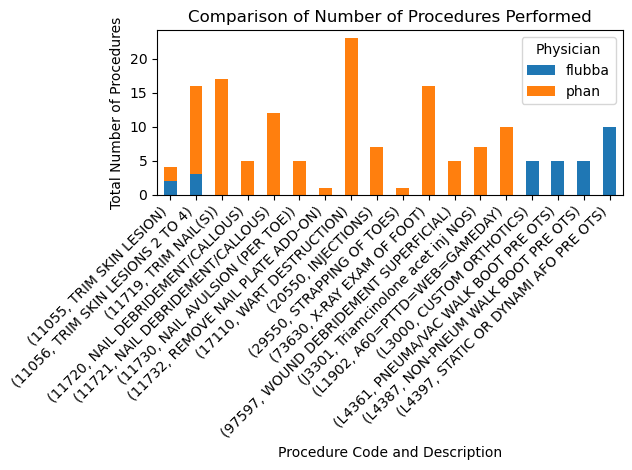

<Figure size 1400x700 with 0 Axes>

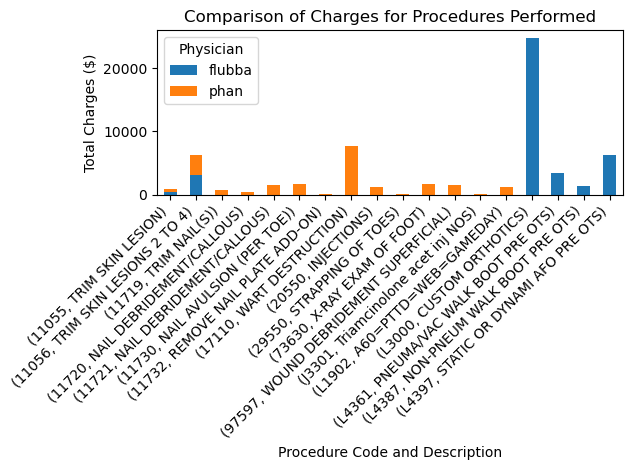

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the total number of procedures (units) performed by each physician
plt.figure(figsize=(14, 7))
procedure_units_plot = procedure_comparison['Units'].plot(kind='bar', stacked=True)
plt.title('Comparison of Number of Procedures Performed')
plt.xlabel('Procedure Code and Description')
plt.ylabel('Total Number of Procedures')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Physician')
plt.tight_layout()

# Show the plot
plt.show()

# Plotting the total charges for procedures performed by each physician
plt.figure(figsize=(14, 7))
procedure_charges_plot = procedure_comparison['Charge'].plot(kind='bar', stacked=True)
plt.title('Comparison of Charges for Procedures Performed')
plt.xlabel('Procedure Code and Description')
plt.ylabel('Total Charges ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Physician')
plt.tight_layout()

# Show the plot
plt.show()
